In [59]:
from gensim.models.keyedvectors import KeyedVectors
from gensim.models import word2vec
pos_vectors = KeyedVectors.load_word2vec_format('../../kor2vec/pos_nouns.vec', binary=False)


In [120]:
import json
import numpy as np
from konlpy.tag import Kkma
from konlpy.utils import pprint
import math
import random

l_quality= open("Lecture_quality.txt", "r", encoding="utf-8").readlines()
load= open("Load.txt", "r", encoding="utf-8").readlines()
grade= open("Grade.txt", "r", encoding="utf-8").readlines()
int_friendly= open("international_friendly.txt", "r", encoding="utf-8").readlines()
CATEGORY_COUNT = 3

In [121]:
scores = []
subjects = [l_quality, load, grade]
def add_to_dict(subject):
    subject_scores={}
    for i in range(len(subject)):
        p = subject[i].split("\t")
        subject_scores[p[0]] = float(p[1][:-1])
    scores.append(subject_scores)

for subject in subjects:
    add_to_dict(subject)

In [122]:
subject_mp = {"강의":0,"널널":1,"성적":2}
def calculate_score(s, subject_str):
    result = 0
    for k,v in scores[subject_mp[subject_str]].items():
        if k in s:
            result += v
#     result=1.0/(1+math.exp(-result))
    result=math.tanh(result)
    return result

In [123]:
REVIEWS = "cs_reviews"

f = open("../reviews_in_one_txt/" + REVIEWS + ".txt","r",encoding="utf-8").readlines()

scores_list = []
subjects_str = ["강의", "널널", "성적"]
for subject_str in subjects_str:
    scores_list_subject=[]
    for i in range(len(f[:])):
        line = f[i]
        course = json.loads(line)
        scores_list_subject.append(calculate_score(course["review_text"], subject_str))
    scores_list.append(scores_list_subject)


In [124]:
f_count_word = {}
count_word = {}
mp = {"A":5,"B":4,"C":3,"D":2,"F":1}

def calc_weight(s):
    return (mp[s]) - 3

for i in range(len(f)):
    line = f[i]
    course = json.loads(line)
    if course["강의"] == "?":
        continue
    words = course["review_text"].split()
    for w in words:
        if w not in count_word:
            count_word[w] = 0
        count_word[w] += calc_weight(course["강의"])


In [125]:
sorted_by_value = sorted(count_word.items(), key=lambda kv: kv[1])[::-1]

In [126]:
# sorted_by_value

In [127]:
score_sum=[0]*7
numberof = [0]*7

def calc_score_avg(column_name):
    for i in range(len(f[:])):
        course = json.loads(f[i])
        #print(mp[course["강의"]],(scores_list[i]))
        if course[column_name] == "?":
            continue
        score_sum[mp[course[column_name]]] += scores_list[subject_mp[column_name]][i]
        numberof[mp[course[column_name]]] += 1;
    

for x in subjects_str:
    print(x)
    score_sum=[0 for j in range(7)]
    numberof = [0 for j in range(7)]
    calc_score_avg(x)
    for k,v in mp.items():
        print(k,score_sum[v]/numberof[v])
    print("-----------------------")


강의
A 0.11654140171441107
B -0.11605949892652138
C -0.14389836361025826
D -0.3468267232471922
F -0.35336293460933754
-----------------------
널널
A 0.6492974124926542
B 0.5444906360106355
C 0.4577797871649972
D 0.27807863658615634
F -0.13546262635607484
-----------------------
성적
A 0.7766436165804492
B 0.7586327909212807
C 0.6174620042184407
D 0.30099574724343114
F -0.04403226531526962
-----------------------


In [128]:
def append_noun(s):
    return "('%s','Noun')" % (s)

naver_wv_categories = ["강의", "부담", "성적"]
wv_update = {}
for i in range(CATEGORY_COUNT):
    for k,v in scores[i].items():
        if append_noun(k) in pos_vectors.vocab:
#             print(k,naver_wv_categories[i])
#             print(pos_vectors.similarity(append_noun(k),append_noun(naver_wv_categories[i])))
            wv_update[k] = pos_vectors.similarity(append_noun(k),append_noun(naver_wv_categories[i]))
        

In [129]:
subjects_str

['강의', '널널', '성적']

In [134]:
review_update = {}
review_update_list = {}

for i in range(len(f)):
    line = f[i]
    course = json.loads(line)

    for j in range(CATEGORY_COUNT):
        if course[subjects_str[j]] == "?":
            continue
        for k,v in scores[j].items():
             if k in course["review_text"]:
                if k not in review_update_list:
                    review_update_list[k] = []
                review_update_list[k].append(calc_weight(course[subjects_str[j]]))

for j in range(CATEGORY_COUNT):
    for k,v in scores[j].items():
        review_update[k] = 0
        if k in review_update_list:
            review_update[k] = sum(review_update_list[k])/len(review_update_list[k])


In [135]:
# review_update

In [136]:
def calc_aggregated_score(s, subject_str):
    result = 0
    for k,v in aggregated_scores[subject_mp[subject_str]].items():
        if k in s:
            result += v
#     result=1.0/(1+math.exp(-result))
    if len(s) == 0:
        return 0
    result =result*100.0/ len(s)
    result=math.tanh(result)
    return result

def calc_aggregated_score_sum(column_name):
    for i in range(len(f[:])):
        course = json.loads(f[i])
        if course[column_name] == "?":
            continue
        score_sum[mp[course[column_name]]] += calc_aggregated_score(course["review_text"], column_name)
        numberof[mp[course[column_name]]] += 1;

In [137]:
import matplotlib.pyplot as plt

Alpha: 0.8 Beta: 0.1 Gamma: 0.09999999999999995
강의


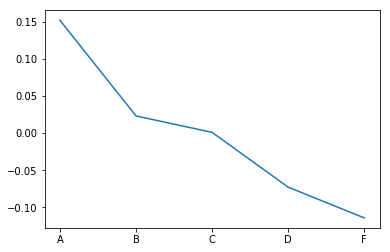

널널


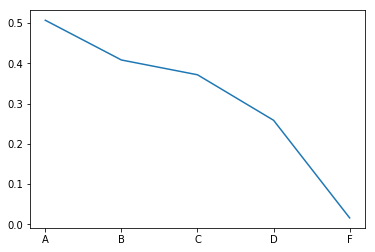

성적


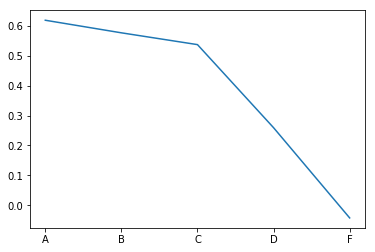

In [156]:
ALPHA = 0.9
BETA = 1e-4
GAMMA = 1 - ALPHA - BETA
for alpha in np.arange(0.8,0.9,0.1):
    for beta in np.arange(0.1, 1.1 - alpha, 0.1):
        
        ALPHA = alpha
        BETA = beta
        GAMMA = 1 - ALPHA - BETA
        if GAMMA < 0 :
            continue
        print("Alpha:",alpha,"Beta:",beta,"Gamma:",GAMMA)
        aggregated_scores = [{} for i in range(CATEGORY_COUNT)]
        for i in range(CATEGORY_COUNT):
            for k,v in scores[i].items():
                aggregated_scores[i][k] = v*ALPHA
                if k in review_update:
                    aggregated_scores[i][k] += review_update[k]*BETA

                if k in wv_update:
                    aggregated_scores[i][k] += wv_update[k]*GAMMA

        for x in subjects_str:
            print(x)
            score_sum=[0 for j in range(7)]
            numberof = [0 for j in range(7)]
            calc_aggregated_score_sum(x)
            x_plt_list = []
            y_plt_list = []

            for k,v in mp.items():
    #             print(k,score_sum[v]/numberof[v])
                x_plt_list.append(score_sum[v]/numberof[v])
                y_plt_list.append(k)

            plt.plot(y_plt_list,x_plt_list)
            plt.show()
    #         break

    #         print("-----------------------")            

In [83]:
# for i in range(CATEGORY_COUNT):
#     with open(str(i) + "_updated.txt","w",encoding="utf-8") as out:
#         for k,v in aggregated_scores[i].items():
#             out.write(k+"\t" + str(v) + "\n")

In [159]:
threshholds = {}
for x in subjects_str:
    print(x)
    score_sum=[0 for j in range(7)]
    numberof = [0 for j in range(7)]
    letter_avg = 0
    calc_aggregated_score_sum(x)
    for k,v in mp.items():
        print(k,score_sum[v]/numberof[v])
        letter_avg += score_sum[v]/numberof[v]
    letter_avg/= 5 
    threshholds[x] = letter_avg
    print("-----------------------")

강의
A 0.15171310085262818
B 0.023031815221532477
C 0.0009512237659241583
D -0.07274146459450867
F -0.1140901829982319
-----------------------
널널
A 0.5072433153121156
B 0.4084249342132251
C 0.37163580312144107
D 0.2584862244917465
F 0.015635225157967184
-----------------------
성적
A 0.6183541171547388
B 0.576329382582396
C 0.5369167281584908
D 0.2593581916629485
F -0.04204009001658741
-----------------------


In [160]:
threshholds

{'강의': -0.002227101550531152,
 '널널': 0.31228510045929914,
 '성적': 0.38978366590839736}

In [161]:
college_years = ["freshman","sophomore","junior","senior"]
allowed_majors = ["CS"]
sentiment_mp = {True: "pos", False: "neg"}
subject_mp = {"강의":0,"널널":1,"성적":2}
rev_subject_mp = {0:"강의", 1:"널널", 2:"성적"}

def get_year(course_code):
    if int(course_code[-3]) - 1 < 4:
        return college_years[int(course_code[-3]) - 1]
    else:
        return "graduate"
    
def flare_from_json(course, is_pos, category):
    course_code = course["course_code"]
    course_name = course["course_name"]
    result = ""
    if course_code[:2] not in allowed_majors:
        return ""
    result += get_year(course_code) + "-"
    result += course_code + "-"
    result += sentiment_mp[is_pos] + "-"
    result += category
    return result


count_reviews = {}
for i in range(len(f)):
    course = json.loads(f[i])
    for category in subjects_str:
        score = calc_aggregated_score(course["review_text"],category)
        is_pos = score > threshholds[category]
        row = flare_from_json(course, is_pos,category)
        if row == "":
            continue
        if row not in count_reviews:
            count_reviews[row] = 0
        count_reviews[row] += 1
       

In [162]:
with open("csonly_reviews_withsentiment_in_flare.csv","w",encoding="utf-8") as out:
    for k,v in count_reviews.items():
        out.write(k+','+str(v)+"\n")